# Sentiment analysis assumption tests
This file runs sentiment analysis on a test set, created by us. The test sets consist of text and a sentiment score provided by us on the content of the text. We use these as the 'true values'. We compare them to the sentiment class that 2 sentiment classication models, SentiWordNet and Vader, provide us.

## Imports

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk import WordNetLemmatizer
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\20203697\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\20203697\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\20203697\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\20203697\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


## Insights into sentiment distribution

In [125]:
df_summary = pd.read_csv("data//test_set_summaries.csv", encoding='latin-1') 
df_paragraphs = pd.read_csv("data//test_set_paragraphs.csv", encoding='latin-1')

In [142]:
df_paragraphs


,index,paragraphs,sentiment,sentiment_writing
0,182,"Al-Fula - Wali of West Kordofan State, Maj. Ge...",1,0.0
1,486,Juba - The Political Bureau of Sudan People Li...,0,0.0
2,596,"Bentiu - ""I used to collect firewood, make cha...",-1,0.0
3,664,TANZANIA'S Under- 23 team test South Sudan hur...,0,0.0
4,720,Juba - South Sudan's government has dismissed ...,-1,0.0
...,...,...,...,...
57,17321,"Mogadishu, Somalia - President Mwai Kibaki has...",0,0.0
58,17869,Juba - The UN Humanitarian coordinator for Sou...,-1,0.0
59,18217,This is a summary of what was said by UNHCR sp...,-1,0.0
60,17869,Juba - The UN Humanitarian coordinator for Sou...,-1,NaN


In [148]:
plt.figure(figsize=(8, 6))
counts_t = list(df_paragraphs.groupby('sentiment').count())
counts_w = list(df_paragraphs.groupby('sentiment_writing').count())
print(counts_t['paragraphs', 'sentiment_writing'])
# counts_t = list(grouped_t['Unnamed: 0'].count())
# counts_w = list(grouped_w['Unnamed: 0'].count())
x = np.arange(len(['negative','neutral','positive']))
bar_width = 0.35
plt.bar(x - bar_width/2, counts_t, bar_width, label='Topic',color="#84b3f5")
plt.bar(x + bar_width/2, counts_w, bar_width, label='Writing style', color="#f09e35")
plt.xlabel('Sentiment')
plt.xticks(x, ['negative (-1)','neutral (0)','positive (1)'])
plt.ylabel('#')
plt.ylim(0,20)
plt.legend()
plt.title("Distribution of topic sentiment of article paragraphs")
plt.savefig("par_double.png", transparent=True)
plt.show()

TypeError: list indices must be integers or slices, not tuple

<Figure size 800x600 with 0 Axes>

## SentiWordNet sentiment analysis

### Read data

In [113]:
df_swn_summary = pd.read_csv("data//test_set_summaries.csv", encoding='latin-1') 
df_swn_paragraphs = pd.read_csv("data//test_set_paragraphs.csv", encoding='latin-1')

### Preprocessing

In [95]:
def preprocess_articles(data,name):
    # Proprocessing the data
    data[name]=data[name].str.lower()
    # Code to remove the Hashtags from the text
    data[name]=data[name].apply(lambda x:re.sub(r'\B#\S+','',x))
    # Code to remove the links from the text
    data[name]=data[name].apply(lambda x:re.sub(r"http\S+", "", x))
    # Code to remove the Special characters from the text 
    data[name]=data[name].apply(lambda x:' '.join(re.findall(r'\w+', x)))
    # Code to substitute the multiple spaces with single spaces
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    # Code to remove all the single characters in the text
    data[name]=data[name].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen
        
        filtered_sentence = [] 

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 
        
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        
        return filtered_sentence
    # Using "getting(sen)" function to append edited sentence to data
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x

lemmatizer = WordNetLemmatizer()
def Lemmatization(data,name):
    def getting2(sen):
        example = sen
        output_sentence =[]
        word_tokens2 = word_tokenize(example)
        lemmatized_output = [lemmatizer.lemmatize(w) for w in word_tokens2]
        
        # Remove characters which have length less than 2  
        without_single_chr = [word for word in lemmatized_output if len(word) > 2]
        # Remove numbers
        cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
        
        return cleaned_data_title
    # Using "getting2(sen)" function to append edited sentence to data
    x=[]
    for i in data[name].values:
        x.append(getting2(i))
    data[name]=x

def make_sentences(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

# Functions from https://www.kaggle.com/code/yommnamohamed/sentiment-analysis-using-sentiwordnet

#### Preprocess summaries

In [97]:
# Copy article summaries to edit and make articles without stopwords
Edited_article = df_swn_summary['summary'].copy()
df_swn_summary['Article_without_stopwords'] = Edited_article
preprocess_articles(df_swn_summary,'Article_without_stopwords')
rem_stopwords_tokenize(df_swn_summary,'Article_without_stopwords')
make_sentences(df_swn_summary, 'Article_without_stopwords')

# Copy article summaries without stopwords and make articles with lemmatized words
final_Edit = df_swn_summary['Article_without_stopwords'].copy()
df_swn_summary["After_lemmatization"] = final_Edit
# Using the Lemmatization function to lemmatize the data
Lemmatization(df_swn_summary,'After_lemmatization')
# Converting all the texts back to sentences
make_sentences(df_swn_summary,'After_lemmatization')

# Remove 'article discusses from summaries'
df_swn_summary['After_lemmatization'] = df_swn_summary['After_lemmatization'].apply(lambda x: ' '.join(x.split(' ')[1:]))

<class 'str'>


#### Preprocess paragraphs

In [98]:
# Copy article paragraphs to edit and make articles without stopwords
Edited_article = df_swn_paragraphs['paragraphs'].copy()
df_swn_paragraphs['Article_without_stopwords'] = Edited_article
preprocess_articles(df_swn_paragraphs,'Article_without_stopwords')
rem_stopwords_tokenize(df_swn_paragraphs,'Article_without_stopwords')
make_sentences(df_swn_paragraphs, 'Article_without_stopwords')

# Copy article paragraphs without stopwords and make articles with lemmatized words
final_Edit = df_swn_paragraphs['Article_without_stopwords'].copy()
df_swn_paragraphs["After_lemmatization"] = final_Edit
# Using the Lemmatization function to lemmatize the data
Lemmatization(df_swn_paragraphs,'After_lemmatization')
# Converting all the texts back to sentences
make_sentences(df_swn_paragraphs,'After_lemmatization')

<class 'str'>


### Perform sentiment analysis

In [99]:
def penn_to_wn(tag):    
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

# Returns list of pos-neg and objective score. But returns empty list if not present in senti wordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    #Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet. 
    #Synset instances are the groupings of synonymous words that express the same concept. 
    #Some of the words have only one Synset and some have several.
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]


# Part of speech tagging for summaries
pos=neg=obj=count=0

postagging_summaries = []

for article in df_swn_summary['After_lemmatization']:
    lists = word_tokenize(article)
    postagging_summaries.append(nltk.pos_tag(lists))

df_swn_summary['pos_tags'] = postagging_summaries

# Part of speech tagging for Paragraphs
pos=neg=obj=count=0

postagging_paragraphs = []

for article in df_swn_paragraphs['After_lemmatization']:
    lists = word_tokenize(article)
    postagging_paragraphs.append(nltk.pos_tag(lists))

df_swn_paragraphs['pos_tags'] = postagging_paragraphs

# Sentiment scores for summaries 
senti_score = []

for pos_val in df_swn_summary['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
df_swn_summary['senti_score'] = senti_score

# Sentiment class for summaries
sentiment_class_swn = []
for i in range(len(df_swn_summary)):
    if df_swn_summary['senti_score'][i]> 0.00:
        sentiment_class_swn.append('Positive')
    elif df_swn_summary['senti_score'][i]< 0.00:
        sentiment_class_swn.append('Negative')
    else:
        sentiment_class_swn.append('Neutral')

df_swn_summary['sentiment_class_swn']=sentiment_class_swn

# Sentiment scores for paragraphs
senti_score_paragraph = []

for pos_val in df_swn_paragraphs['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score_paragraph.append(pos - neg)
    pos=neg=0    
    
df_swn_paragraphs['senti_score'] = senti_score_paragraph

# Sentiment class for paragraphs
sentiment_class_swn = []
for i in range(len(df_swn_paragraphs)):
    if df_swn_paragraphs['senti_score'][i]> 0.00:
        sentiment_class_swn.append('Positive')
    elif df_swn_paragraphs['senti_score'][i]< 0.00:
        sentiment_class_swn.append('Negative')
    else:
        sentiment_class_swn.append('Neutral')

df_swn_paragraphs['sentiment_class_swn']=sentiment_class_swn

print(df_swn_paragraphs)

    index                                         paragraphs  sentiment  \
0     182  Al-Fula - Wali of West Kordofan State, Maj. Ge...          1   
1     486  Juba - The Political Bureau of Sudan People Li...          0   
2     596  Bentiu - "I used to collect firewood, make cha...         -1   
3     664  TANZANIA'S Under- 23 team test South Sudan hur...          0   
4     720  Juba - South Sudan's government has dismissed ...         -1   
5    1113  President Abdel Fattah El Sisi stressed on Wed...          1   
6    1245  Juba - The government delegation, headed by Lt...          1   
7    1989  Kampala - As Uganda Cranes aim to draw first b...          0   
8    2109  South Sudan's vice-president designate Riek Ma...         -1   
9    2406  Malabo - The President of Chad and current Cha...          0   
10   3429  Arusha - THE South Sudan Intra- SPLM dialogue ...          1   
11   3727  Juba - The Member of the National Legislative ...          0   
12   3934  Nairobi - Viol

### Plot and save data

Text(0.5, 1.0, 'Distribution of sentiment classes of summaries by SentiWordNet')

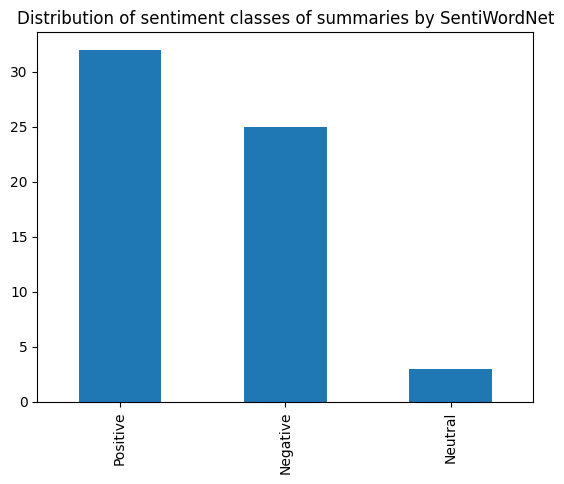

In [100]:
# Plot distribution of sentiment classes of summaries
ax = df_swn_summary['sentiment_class_swn'].value_counts().plot(kind='bar')
ax.set_title('Distribution of sentiment classes of summaries by SentiWordNet')

Text(0.5, 1.0, 'Distribution of sentiment classes of paragraphs by SentiWordNet')

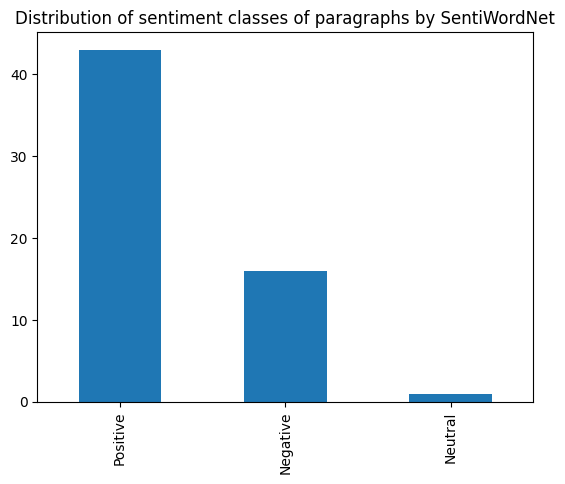

In [101]:
# Plot distribution of sentiment classes of paragraphs
ax = df_swn_paragraphs['sentiment_class_swn'].value_counts().plot(kind='bar')
ax.set_title('Distribution of sentiment classes of paragraphs by SentiWordNet')

In [102]:
# Save sentiment of article summaries and paragraphs to csv
df_swn_summary.to_csv("data/sentiment_summaries_swn.csv")
df_swn_paragraphs.to_csv("data/sentiment_paragraphs_swn.csv")

## Vader sentiment analysis

In [103]:
df_summaries_vader = pd.read_csv("data//test_set_summaries.csv", encoding='latin-1') 
df_paragraphs_vader =pd.read_csv("data//test_set_paragraphs.csv", encoding='latin-1')

### Sentiment analysis function

In [104]:
# This function creates a column with the sentiment score of a text column according to the VADER sentiment analysis
def sentiment_scores(df, column):
 
    sia = SentimentIntensityAnalyzer()
    df['sentiment_score'] = [sia.polarity_scores(x)['compound'] for x in df[column]]
    df.loc[df['sentiment_score']>0.05,'sentiment_class_vader'] = 'Positive'
    df.loc[df['sentiment_score']<-0.05,'sentiment_class_vader'] = 'Negative'
    df.loc[abs(df['sentiment_score'])<0.05,'sentiment_class_vader'] = 'Neutral'
    return df

### Sentiment analysis on summaries

In [105]:
df_summaries_vader = sentiment_scores(df_summaries_vader, 'summary')
df_summaries_vader.to_csv("data/sentiment_summaries_vader.csv")

### Sentiment analysis on paragraphs

In [106]:
df_paragraphs_vader = sentiment_scores(df_paragraphs_vader, 'paragraphs')
df_paragraphs_vader.to_csv("data/sentiment_paragraphs_vader.csv")

## Evaluation